In [1]:
import numpy as np
import pandas as pd
from ga import SelectionMethods, evolve, initialize_population, select, fitness
from grammar import translate
import config
import os

### Number of Generations definition

In [2]:
directory = config.get_directory_name('bc', cx=0.9, mx=0.05, gnx=0.05, ts=2, pop=50, gen=50)
for _ in range(2):
    directory = os.path.dirname(directory)
directory

subdirectories = [x[0] for x in os.walk(directory)][1:]

In [3]:
dfs = []

for sd in subdirectories:
    df_temp = pd.read_csv(sd + '/best.txt')
    df_temp['gen'] = int(os.path.basename(sd).split('-')[1])
    dfs.append(df_temp)
df = pd.concat(dfs)
df.sort_values('gen', inplace=True)
df.drop(columns=['mean_fitness', 'std_fitness'], inplace=True)

In [4]:
df['computational_cost'] = [2, 4, 10, 61, 185]

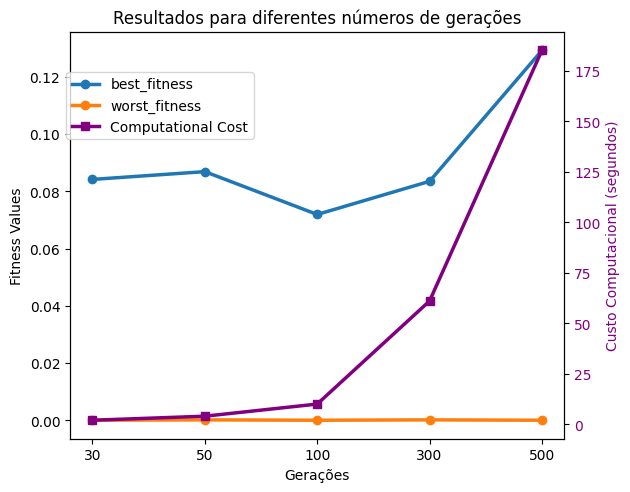

In [5]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

x_indices = np.arange(len(df['gen']))

for coluna in df.columns:
    if coluna != 'gen' and coluna != 'computational_cost':
        ax1.plot(x_indices, df[coluna], marker='o', linewidth=2.5, label=coluna)

ax1.set_xlabel('Gerações')
ax1.set_ylabel('Fitness Values')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(x_indices, df['computational_cost'], color='purple', marker='s', linewidth=2.5, label='Computational Cost')
ax2.set_ylabel('Custo Computacional (segundos)', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

plt.xticks(x_indices, df['gen'])

fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
fig.tight_layout()
plt.title('Resultados para diferentes números de gerações')
plt.show()

### Population Size definition

In [10]:
directory = config.get_directory_name('bc', cx=0.9, mx=0.05, gnx=0.05, ts=2, pop=50, gen=50)
for _ in range(3):
    directory = os.path.dirname(directory)
directory

subdirectories = [directory + '/' + sd + '/gen-300' for sd in next(os.walk(directory))[1]]
subdirectories

['./experimentation/bc/cx-0.9/mx-0.05/gnx-0.05/ts-2/pop-100/gen-300',
 './experimentation/bc/cx-0.9/mx-0.05/gnx-0.05/ts-2/pop-20/gen-300',
 './experimentation/bc/cx-0.9/mx-0.05/gnx-0.05/ts-2/pop-300/gen-300',
 './experimentation/bc/cx-0.9/mx-0.05/gnx-0.05/ts-2/pop-50/gen-300',
 './experimentation/bc/cx-0.9/mx-0.05/gnx-0.05/ts-2/pop-500/gen-300']

In [11]:
dfs = []

for sd in subdirectories:
    df_temp = pd.read_csv(sd + '/best.txt')
    for _ in range(1):
        tmp = os.path.dirname(sd)
    df_temp['pop_size'] = int(os.path.basename(tmp).split('-')[1])
    dfs.append(df_temp)
df = pd.concat(dfs)
df.sort_values('pop_size', inplace=True)
df.drop(columns=['mean_fitness', 'std_fitness'], inplace=True)
df

,best_fitness,worst_fitness,pop_size
0,0.059213,0.000000e+00,20
0,0.083480,1.300266e-04,50
0,0.105634,0.000000e+00,100
0,0.133111,6.232449e-16,300
0,0.124928,0.000000e+00,500


In [14]:
df['computational_cost'] = [12, 32, 75, 131, 395]

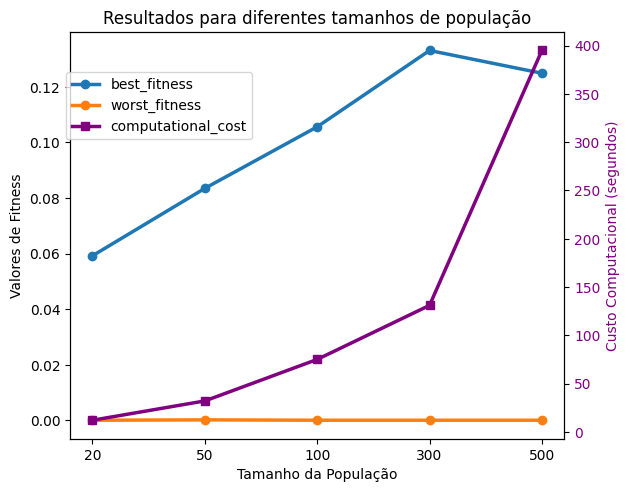

In [15]:
fig, ax1 = plt.subplots()

x_indices = np.arange(len(df['pop_size']))

for coluna in df.columns:
    if coluna != 'pop_size' and coluna != 'computational_cost':
        ax1.plot(x_indices, df[coluna], marker='o', linewidth=2.5, label=coluna)

ax1.set_xlabel('Tamanho da População')
ax1.set_ylabel('Valores de Fitness')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(x_indices, df['computational_cost'], color='purple', marker='s', linewidth=2.5, label='computational_cost')
ax2.set_ylabel('Custo Computacional (segundos)', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

plt.xticks(x_indices, df['pop_size'])

fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
fig.tight_layout()
plt.title('Resultados para diferentes tamanhos de população')
plt.show()